<a href="https://colab.research.google.com/github/teixeirah-eth/ELT-574/blob/main/ELT574_115098_Atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import seaborn as sns

print('Setup completo!')

Setup completo!


Ajuste um modelo de SVM de margens rígidas para classificar as amostras linearmente separáveis do problema, considerando as variáveis de entrada "petal length in cm" e "petal width in cm" do banco de dados.  Adicione o ponto [2.5, 1.1] do tipo Iris setosa e explique o que acontece com a margem rígida da SVM.

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]


In [4]:
from sklearn.svm import SVC

svm_clf = SVC(kernel="linear", C=10000.0)
svm_clf.fit(X, y)


SVC(C=10000.0, kernel='linear')

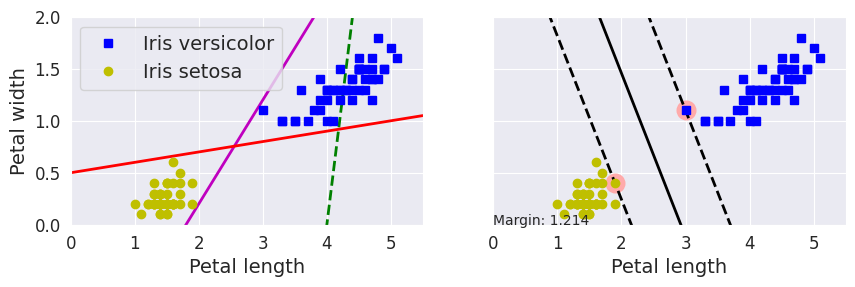

In [5]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # Na fronteira de decisao, w0*x0 + w1*x1 + b = 0
    # Hiperplano de decisao => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#FFAAAA') #identifica os pontos do vetor de suporte
    plt.plot(x0, decision_boundary, "k-", linewidth=2) #hiperplano de suporte
    plt.plot(x0, gutter_up, "k--", linewidth=2) # vetor de suporte +1
    plt.plot(x0, gutter_down, "k--", linewidth=2) # vetor de suporte -1
    plt.annotate('Margin: {}'.format(round(margin,3)),(xmin,xmin)) #exibe o valor da margem de separação

# Criando retas de classificacao para o espaco de caracteristicas
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

# Configurando a figura com subplots
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True) # sharey -> compartilhar eixo y

plt.sca(axes[0]) # subplot 0 - retas pred_1, pred_2 e pred_3
plt.plot(x0, pred_1, "g--", linewidth=2) # reta verde tracejada
plt.plot(x0, pred_2, "m-", linewidth=2) # reta magenta continua
plt.plot(x0, pred_3, "r-", linewidth=2) # reta vermelha continua
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1]) # subplot 1 - Classificador SVM linear
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])


plt.show()

No grafico assim, ilustra-se a SVM de margens rigidas.

In [6]:
extraDot = [2.5, 1.1]
updatedX = np.append(X, extraDot)
updatedY = np.append(y, extraDot)
svm_clf.fit(updatedX, updatedY)

ValueError: Expected 2D array, got 1D array instead:
array=[1.4 0.2 1.4 0.2 1.3 0.2 1.5 0.2 1.4 0.2 1.7 0.4 1.4 0.3 1.5 0.2 1.4 0.2
 1.5 0.1 1.5 0.2 1.6 0.2 1.4 0.1 1.1 0.1 1.2 0.2 1.5 0.4 1.3 0.4 1.4 0.3
 1.7 0.3 1.5 0.3 1.7 0.2 1.5 0.4 1.  0.2 1.7 0.5 1.9 0.2 1.6 0.2 1.6 0.4
 1.5 0.2 1.4 0.2 1.6 0.2 1.6 0.2 1.5 0.4 1.5 0.1 1.4 0.2 1.5 0.2 1.2 0.2
 1.3 0.2 1.4 0.1 1.3 0.2 1.5 0.2 1.3 0.3 1.3 0.3 1.3 0.2 1.6 0.6 1.9 0.4
 1.4 0.3 1.6 0.2 1.4 0.2 1.5 0.2 1.4 0.2 4.7 1.4 4.5 1.5 4.9 1.5 4.  1.3
 4.6 1.5 4.5 1.3 4.7 1.6 3.3 1.  4.6 1.3 3.9 1.4 3.5 1.  4.2 1.5 4.  1.
 4.7 1.4 3.6 1.3 4.4 1.4 4.5 1.5 4.1 1.  4.5 1.5 3.9 1.1 4.8 1.8 4.  1.3
 4.9 1.5 4.7 1.2 4.3 1.3 4.4 1.4 4.8 1.4 5.  1.7 4.5 1.5 3.5 1.  3.8 1.1
 3.7 1.  3.9 1.2 5.1 1.6 4.5 1.5 4.5 1.6 4.7 1.5 4.4 1.3 4.1 1.3 4.  1.3
 4.4 1.2 4.6 1.4 4.  1.2 3.3 1.  4.2 1.3 4.2 1.2 4.2 1.3 4.3 1.3 3.  1.1
 4.1 1.3 2.5 1.1].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.